<a href="https://colab.research.google.com/github/Jingut/EX/blob/main/Exp_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''%cd /content/drive/MyDrive/rock_scissor_paper/train

!unzip -qq "/content/drive/MyDrive/rock_scissor_paper/train/train.zip"'''

'%cd /content/drive/MyDrive/rock_scissor_paper/train\n\n!unzip -qq "/content/drive/MyDrive/rock_scissor_paper/train/train.zip"'

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


In [ ]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
scissors_dir_path = '/content/drive/MyDrive/rock_scissor_paper/train/in/scissor2'
resize_images(scissors_dir_path)

rock_dir_path = '/content/drive/MyDrive/rock_scissor_paper/train/in/rock2'
resize_images(rock_dir_path)

paper_dir_path = '/content/drive/MyDrive/rock_scissor_paper/train/in/paper2'
resize_images(paper_dir_path)

test0_dir_path = '/content/drive/MyDrive/rock_scissor_paper/test/scissor'
resize_images(test0_dir_path)

test1_dir_path = '/content/drive/MyDrive/rock_scissor_paper/test/rock'
resize_images(test1_dir_path)

test2_dir_path = '/content/drive/MyDrive/rock_scissor_paper/test/paper'
resize_images(test2_dir_path)


901  images to be resized.
901  images resized.
1001  images to be resized.
1001  images resized.
1505  images to be resized.
1505  images resized.
300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=3407):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/train'
test_dir_path = '/content/drive/MyDrive/rock_scissor_paper/test'

(x_train, y_train)=load_data(image_dir_path)
(x_test, y_test)=load_data(test_dir_path)

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (3407, 28, 28, 3)
y_train shape: (3407,)


라벨:  0


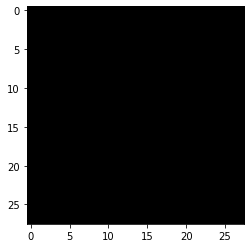

In [ ]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 딥러닝 네트워크 설계하기

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3))) 
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
             
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

#  모델훈련


In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
107/107 [==============================] - 1s 6ms/step - loss: 1.0305 - accuracy: 1.0000
Epoch 2/10
107/107 [==============================] - 1s 7ms/step - loss: 0.9021 - accuracy: 1.0000
Epoch 3/10
107/107 [==============================] - 1s 7ms/step - loss: 0.7887 - accuracy: 1.0000
Epoch 4/10
107/107 [==============================] - 1s 6ms/step - loss: 0.6895 - accuracy: 1.0000
Epoch 5/10
107/107 [==============================] - 1s 6ms/step - loss: 0.6034 - accuracy: 1.0000
Epoch 6/10
107/107 [==============================] - 1s 6ms/step - loss: 0.5289 - accuracy: 1.0000
Epoch 7/10
107/107 [==============================] - 1s 6ms/step - loss: 0.4649 - accuracy: 1.0000
Epoch 8/10
107/107 [==============================] - 1s 6ms/step - loss: 0.4099 - accuracy: 1.0000
Epoch 9/10
107/107 [==============================] - 1s 6ms/step - loss: 0.3626 - accuracy: 1.0000
Epoch 10/10
107/107 [==============================] - 1s 6ms/step - loss: 0.3219 - accuracy: 1.0000

# 모델시험

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

107/107 - 0s - loss: 2.4926 - accuracy: 0.8301 - 462ms/epoch - 4ms/step
test_loss: 2.4925761222839355 
test_accuracy: 0.8300557732582092


In [ ]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9999881e-01 1.1536849e-06 1.9377438e-08]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


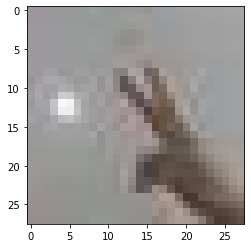

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [9.9994779e-01 6.6028429e-07 5.1537092e-05]
라벨: 2, 예측결과: 0


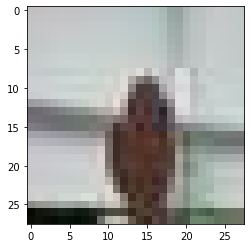

예측확률분포: [9.9999917e-01 7.8062772e-07 6.4137984e-10]
라벨: 2, 예측결과: 0


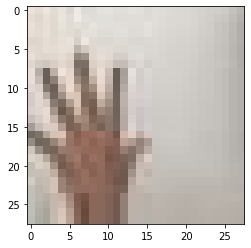

예측확률분포: [9.999994e-01 8.587272e-08 5.346218e-07]
라벨: 2, 예측결과: 0


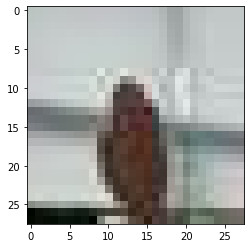

예측확률분포: [9.9988782e-01 1.1221046e-04 7.5276505e-09]
라벨: 1, 예측결과: 0


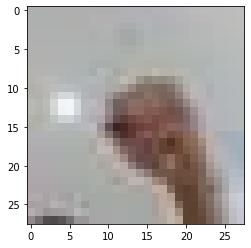

예측확률분포: [8.4279990e-01 1.5720008e-01 1.7533454e-08]
라벨: 1, 예측결과: 0


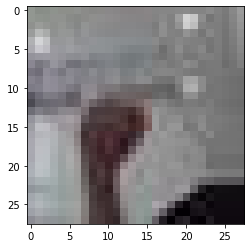

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:

    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 결론
이번 프로젝트에서는 직접 찍은 가위,바위,보 사진을 이용하여 가위바위보 분류기를 만들어보았습니다.
입력이미지 조건은 28x28으로 해주었고 마지막에 랜덤하게 예측결과를 출력해보았을 때 예측결과가 0인 경우가 많았고 테스트 로스는 2.49
테스트 정확도는 0.83으로 나왔습니다.


# 회고

-이번 프로젝트에서 어려웠던 점
당연하겠지만 제가 준비한 데이터셋만으로는 정확도가 충분히 나오지 않았어서 다른분들의 데이터셋도 가져오고 오버피팅을 피하기 위해 테스트 데이터셋도 조금씩 섞어가며 학습을 진행하였는데 데이터셋이 무조건 많은 것도 능사가 아니라고 느낀것이 어쩔 때에는 언더피팅이 되어버리고 어떤 때에는 오버피팅이 되는거 같아 적절한 지점을 찾는 것이 어려웠습니다.  

---

-프로젝트를 진행하면서 알게 된 점
신경망의 하이퍼 파라미터를 조절 해보는 방법도 알게되었고 학습데이터셋과 라벨데이터셋을 어떤 비율로 설정하먼 정확도에 좋은 영향을 주는지 알 수 있었습니다.

---

-루브릭 지표달성을 위해 노력한것
다른 분들의 데이터셋을 추가로 확장하고 이것도 부족하다 생각하여 제가 각각 300장씩 추가로 더 찍어서 학습데이터에 추가하였습니다. 그리고 테스트 데이터셋을 조금 더 세분화 하기 위해 학습데이터셋과 겹치지 않고 다양하게 배치해보았습니다.

두 번째로 신경망부분의 하이퍼 파라미터를 직접 조절하여 특징을 한번에 얼마나 작은부분에서부터 큰부분의 특징으로 잡아낼지 조절해보았으나 이 프로젝트에서는 큰 효과가 없었습니다.


---


-자기다짐

다음에는 직접 신경망의 층을 추가하여 정확도를 올려보고 싶습니다

가위바위보 세가지 클래스만이 아닌 더 다양한 라벨 값을 가지는 프로젝트를 따로 진행해보고 싶습니다.